In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
url = "https://opendata.dwd.de/climate_environment/CDC/event_catalogues/germany/precipitation/CatRaRE_v2021.01/data/CatRaRE_2001_2020_W3_Eta_v2021_01.csv"
data = np.genfromtxt(url, delimiter=",", names=True,
                     dtype="i8,S10,S10,i8,i8,i8,S23,S23,i8,i8,f8,f8,f8,i8,i8,i8,i8,i8,i8,S23,S23,S23,f8,f8,f8,S12,S12,i8,i8,i8,i8,S6,i8,S6,i8,i8,f8,i8,i8,i8,f8,i8,i8,i8,i8,f8,f8,f8,i8,f8,i8,i8,i8,i8,i8,f8,i8,f8,f8,f8,f8")
data[0]

(1, b'W3_Eta_v20', b'W3_Eta_1', 1, 200101020350, 200101020750, b'2001-01-02T03:49:59.000', b'2001-01-02T07:50:00.000', 4, 51, 44.6, 51., 100., 1, 286, 183, -157462, -4575645, 8315037, b'Baden-W\xfcrttemberg', b'Breisgau-Hochschwarzwal', b'Feldberg (Schwarzwald)', 2.6, 51.5, 38., b'28', b'4', 5, 3, 0, 19, b'SWAZF', 19, b'SWAZF', 19, 12, 16.5, 20, 29, 19, 24.8, 30, 6, 620, 21, 0.1, 0.5, 64.9, 0, 0.4, 85, 312, 312, 1187, 585, 1102.3, 1462, -26.1, -311.9, -8.6, 223.5)

In [8]:
print(np.max(data["RRmax"]), np.min(data["RRmean"]))
print(np.mean(data["Duration"]))

462.0 25.6
5.051172893136403


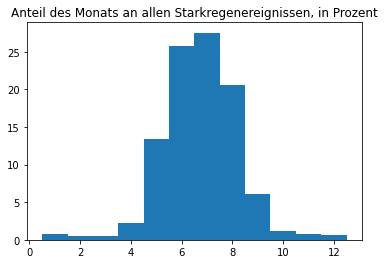

In [9]:
def getmonthfromintdate(intdate):
    return int(str(intdate)[4:6])

assert getmonthfromintdate(200101020350) == 1

def getmonthcount(data, month):
    mask = [getmonthfromintdate(intdate) == month
            for intdate in data["Start_Time"]]
    return len(data[mask])

months = np.arange(1,13)
counts = np.array([getmonthcount(data, month)
                   for month in months])
densities = 100 * counts / len(data)
plt.title("Anteil des Monats an allen Starkregenereignissen, in Prozent")
plt.bar(months, densities, width=1)
plt.show()

In [10]:
# Funktioniert nicht:
duessel = data[data["GMD_RRmax"] == "Düsseldorf"]
len(duessel)

# Stattdessen:
for entry in data["GMD_RRmax"]:
    if("sseldorf" in str(entry)):
        print(entry)
        break
        

b'D\xfcsseldorf'


7


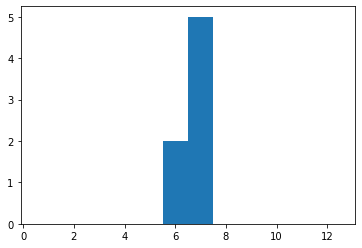

In [11]:
# Also:
city = b'D\xfcsseldorf'
citydata = data[data["GMD_RRmax"] == city]
print(len(citydata))
citycounts = np.array([getmonthcount(citydata, month)
                       for month in months])
plt.bar(months, citycounts, width=1)
plt.show()

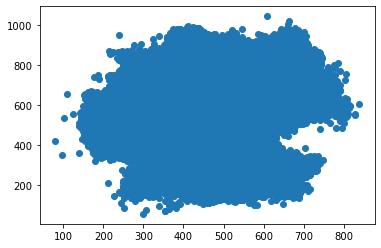

In [12]:
plt.scatter(data["x_RRmax"], data["y_RRmax"])
plt.show()

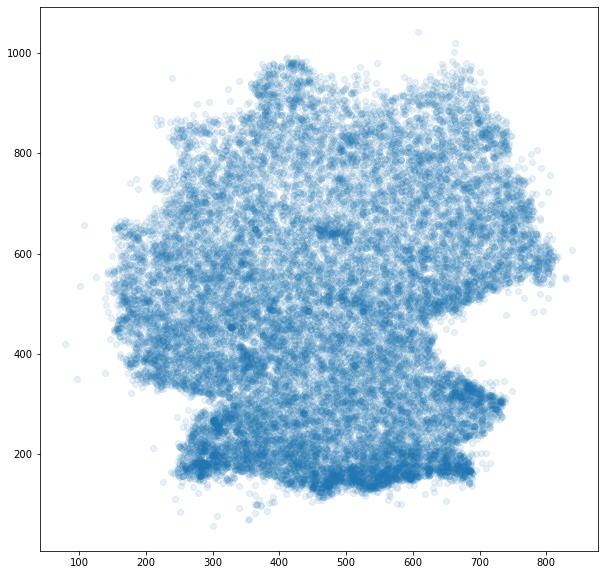

In [13]:
plt.rcParams["figure.figsize"] = (10,10)
plt.scatter(data["x_RRmax"], data["y_RRmax"], alpha=0.1)
plt.show()

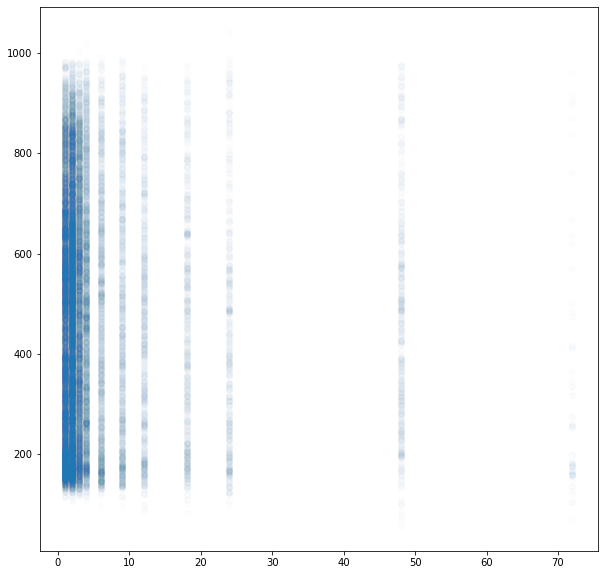

In [14]:
plt.scatter(data["Duration"], data["y_RRmax"], alpha=0.01)
plt.show()

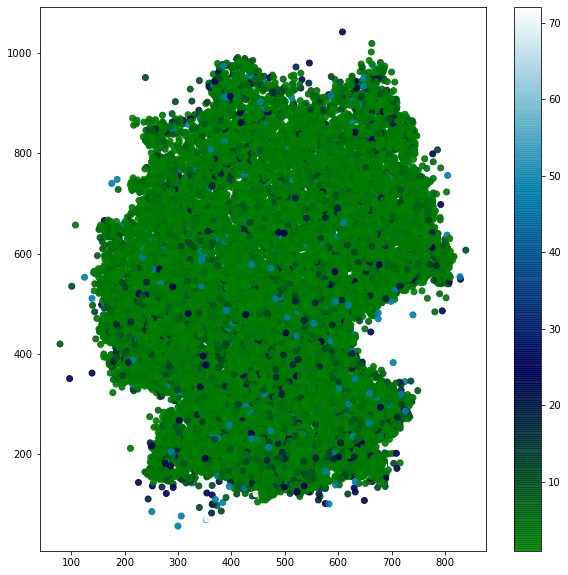

In [15]:
plt.scatter(data["x_RRmax"], data["y_RRmax"],
            alpha=0.9, c=data["Duration"],
            cmap="ocean")
plt.colorbar()
plt.show()

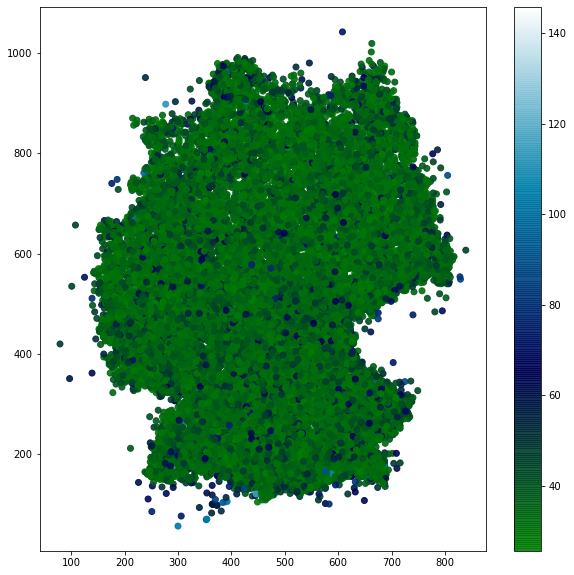

In [16]:
plt.scatter(data["x_RRmax"], data["y_RRmax"],
            alpha=0.9, c=data["RRmean"],
            cmap="ocean")
plt.colorbar()
plt.show()

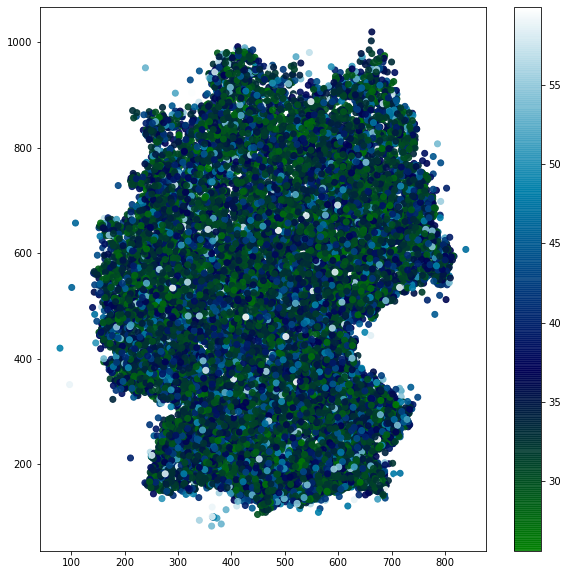

In [17]:
calm_data = data[data["RRmean"] < 60]
plt.scatter(calm_data["x_RRmax"], calm_data["y_RRmax"],
            alpha=0.9, c=calm_data["RRmean"],
            cmap="ocean")
plt.colorbar()
plt.show()

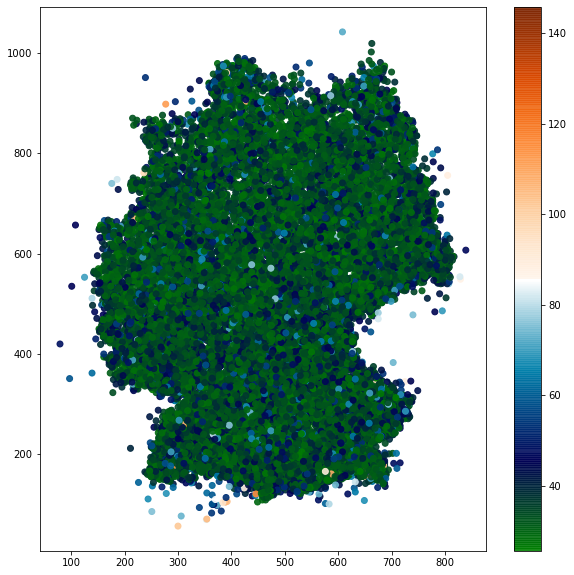

In [18]:
from matplotlib import cm
from matplotlib.colors import ListedColormap
top = cm.get_cmap('ocean', 128)
bottom = cm.get_cmap('Oranges', 128)
newcolors = np.vstack((top(np.linspace(0, 1, 128)),
                       bottom(np.linspace(0, 1, 128))))
my_colormap = ListedColormap(newcolors, name='My Colormap')

plt.scatter(data["x_RRmax"], data["y_RRmax"],
            alpha=0.9, c=data["RRmean"],
            cmap=my_colormap)
plt.colorbar()
plt.show()